Practical 6 PART A

>B-76

> Shivam Gupta


In [ ]:
import pandas as pd
titanic_df = pd.read_csv("/content/titanic dataset.csv")
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,False,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,False,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,False,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,False,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske
import tensorflow as tf
# from tensorflow.contrib import skflow

In [ ]:
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

In [ ]:
titanic_df["home_dest"] = titanic_df["home_dest"].fillna("NA")

In [ ]:
titanic_df = titanic_df.dropna()

In [ ]:
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home_dest    1043
dtype: int64

In [ ]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home_dest'],axis=1)
    return processed_df
processed_df = preprocess_titanic_df(titanic_df)
processed_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,True,0,29.0000,0,0,211.3375,2
1,1,True,1,0.9167,1,2,151.5500,2
2,1,False,0,2.0000,1,2,151.5500,2
3,1,False,1,30.0000,1,2,151.5500,2
4,1,False,0,25.0000,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
1301,3,False,1,45.5000,0,0,7.2250,0
1304,3,False,0,14.5000,1,0,14.4542,0
1306,3,False,1,26.5000,0,0,7.2250,0
1307,3,False,1,27.0000,0,0,7.2250,0


In [ ]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
clf_dt = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)
clf_dt

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.486\nsamples = 834\nvalue = [487, 347]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\ngini = 0.359\nsamples = 315\nvalue = [74, 241]'),
 Text(0.125, 0.375, 'X[5] <= 32.09\ngini = 0.134\nsamples = 194\nvalue = [14, 180]'),
 Text(0.0625, 0.125, 'gini = 0.23\nsamples = 83\nvalue = [11, 72]'),
 Text(0.1875, 0.125, 'gini = 0.053\nsamples = 111\nvalue = [3, 108]'),
 Text(0.375, 0.375, 'X[5] <= 23.087\ngini = 0.5\nsamples = 121\nvalue = [60, 61]'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 102\nvalue = [43, 59]'),
 Text(0.4375, 0.125, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.75, 0.625, 'X[2] <= 12.5\ngini = 0.325\nsamples = 519\nvalue = [413, 106]'),
 Text(0.625, 0.375, 'X[3] <= 2.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]'),
 Text(0.5625, 0.125, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.875, 0.375, 'X[0] <= 1.5\ngini = 0.29\nsamples = 477\nvalue = [393, 84]')

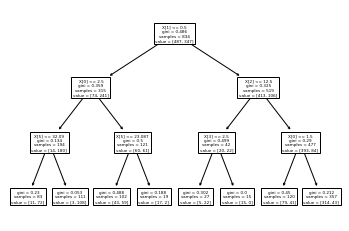

In [ ]:
tree.plot_tree(clf_dt)

In [ ]:
titanic_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'home_dest'],
      dtype='object')

In [ ]:
X

array([[  1.    ,   0.    ,  29.    , ...,   0.    , 211.3375,   2.    ],
       [  1.    ,   1.    ,   0.9167, ...,   2.    , 151.55  ,   2.    ],
       [  1.    ,   0.    ,   2.    , ...,   2.    , 151.55  ,   2.    ],
       ...,
       [  3.    ,   1.    ,  26.5   , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  27.    , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  29.    , ...,   0.    ,   7.875 ,   2.    ]])

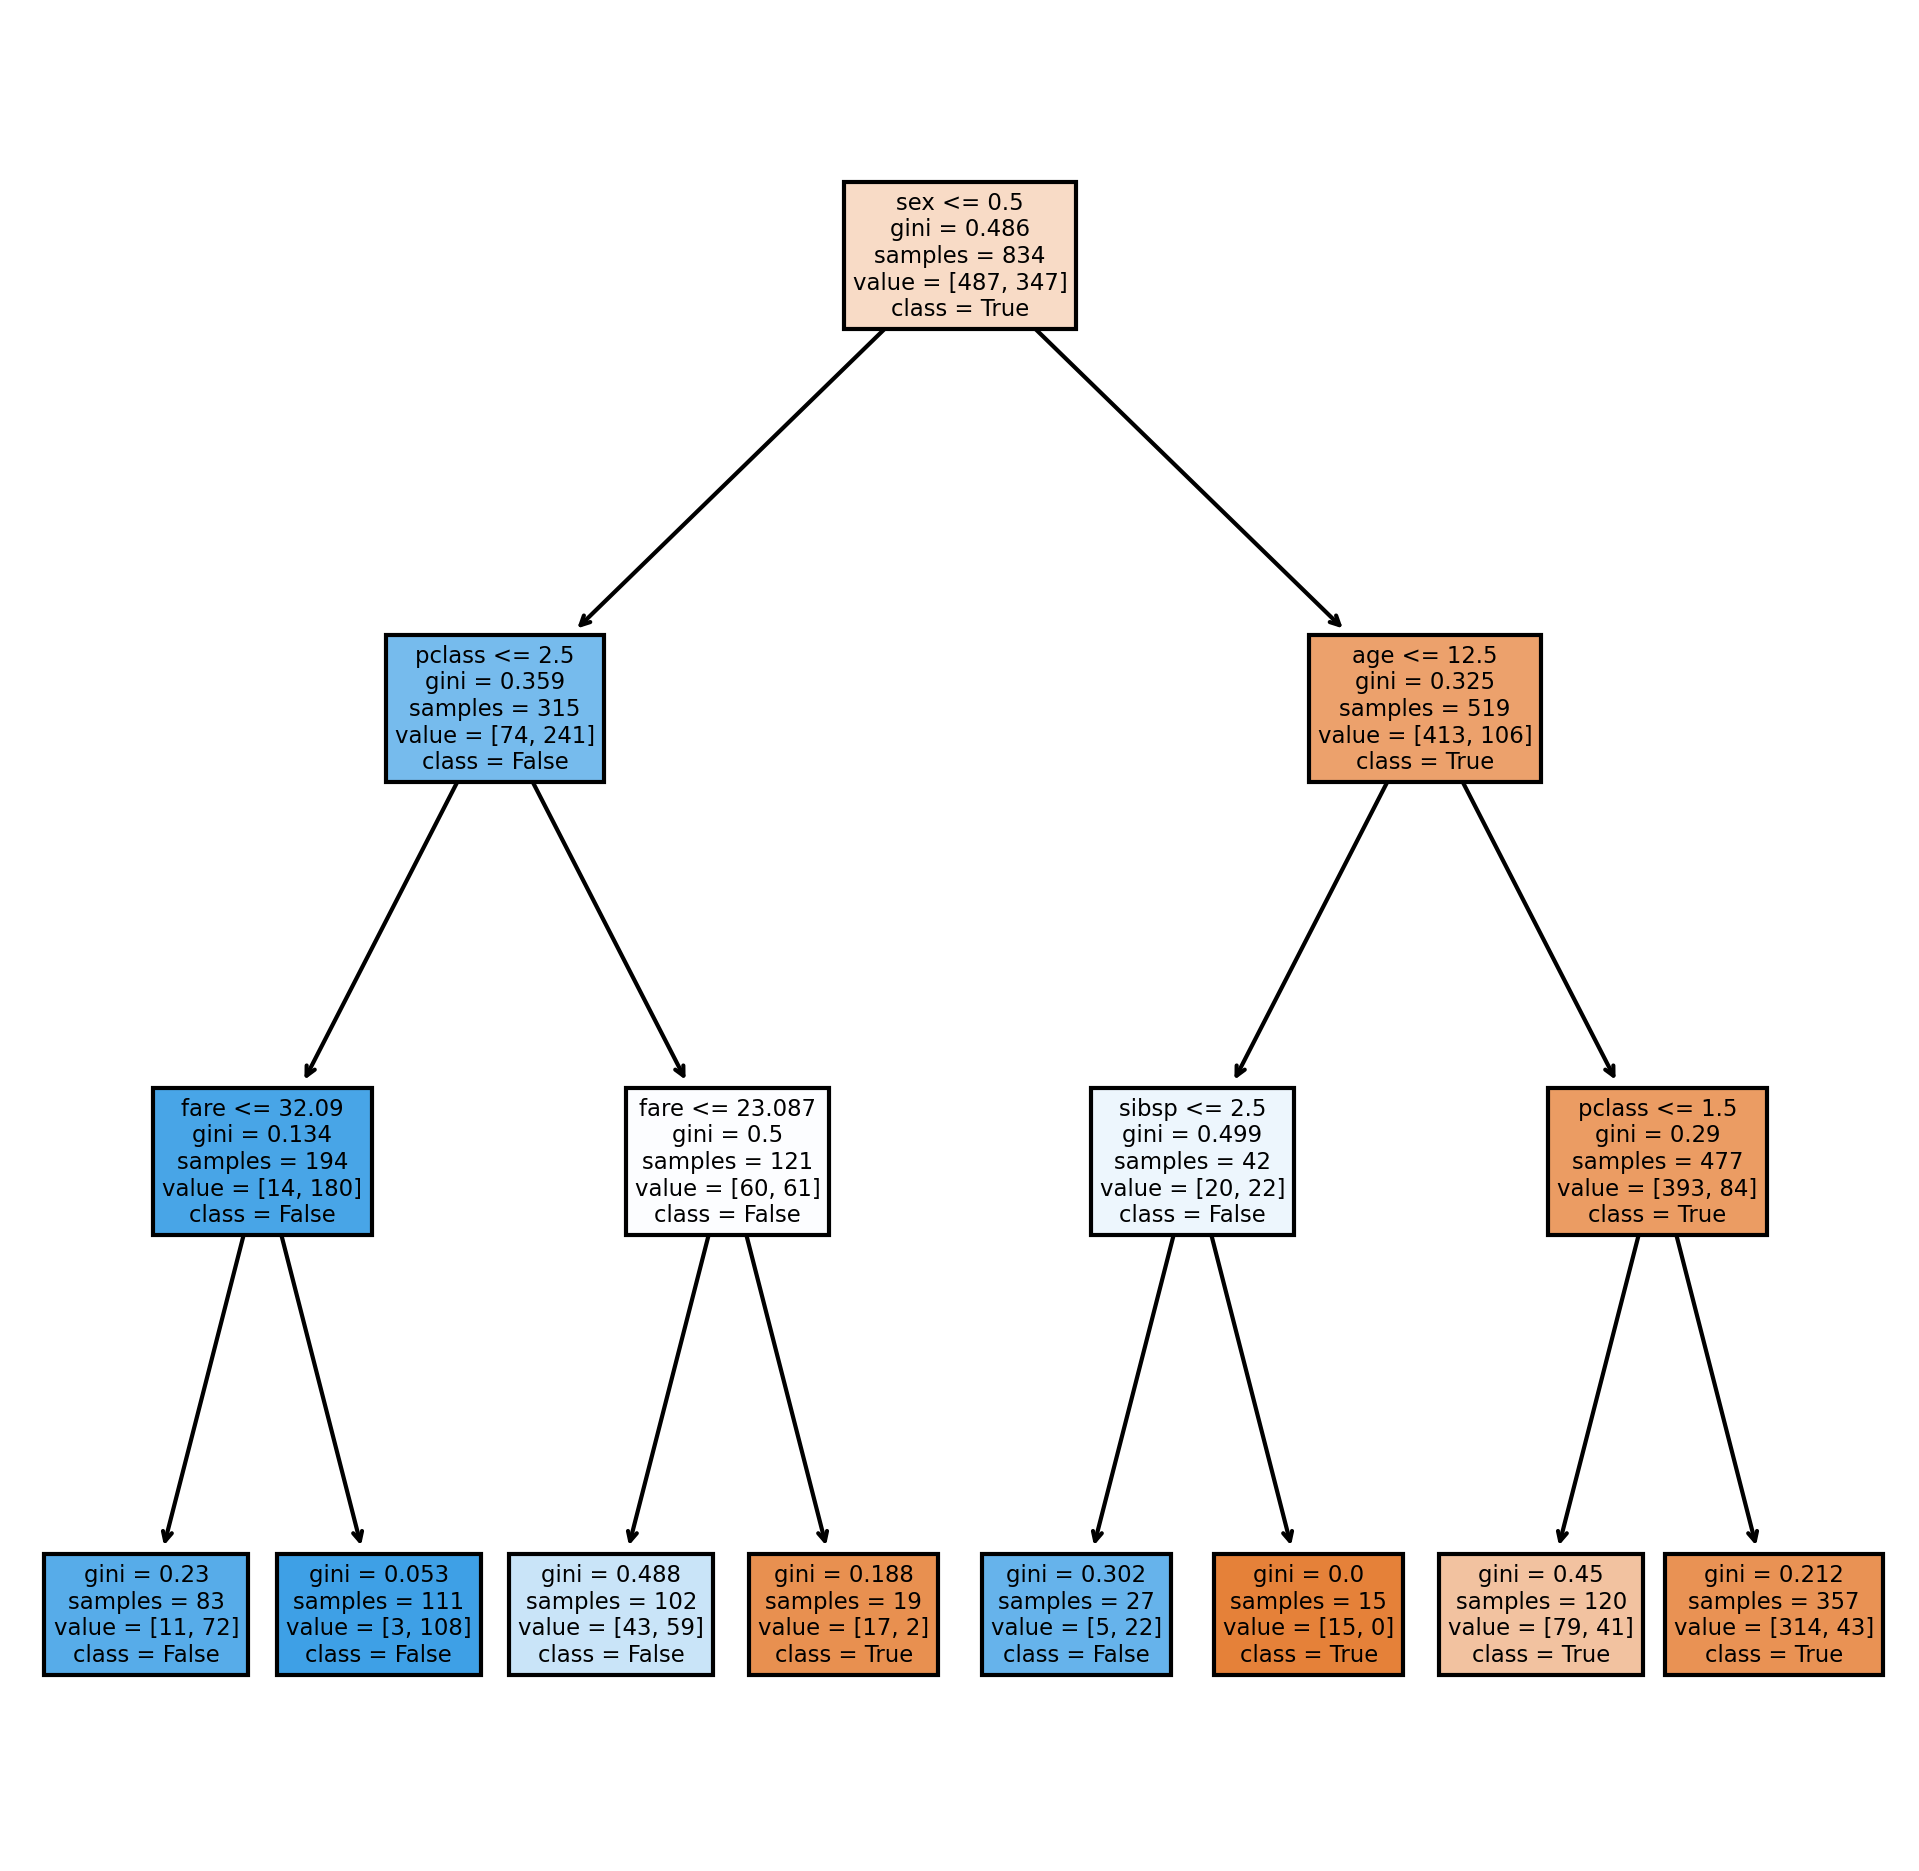

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
fn=['pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked']
cn=['True', 'False']
tree.plot_tree(clf_dt,feature_names = fn,
               class_names=cn,filled=True, ax=axes)
plt.savefig('survival_tree.png')